In [1]:
%pip install pandas numpy matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
Respondants = pd.read_csv("/Users/calder/Documents/Statistics Project/StatisticalAnalysis/CRLS Student Equity & Course Experience Survey  (Responses) - Form Responses 1 (1).csv")

In [15]:
race = "How do you describe your racial/ethnic identity? (Select all that apply)"
resp = Respondants[race]
resp.head()
unique_resp = list(sorted(resp.unique()))
print(unique_resp)


['Asian', 'Asian, Black or African American', 'Asian, Black or African American, Hispanic/Latino', 'Asian, Hispanic/Latino', 'Asian, Hispanic/Latino, White', 'Asian, Pacific Islander, White', 'Asian, White', 'Asian, Yellow', 'Black or African American', 'Black or African American, Hispanic/Latino', 'Black or African American, Native American/Indigenous', 'Black or African American, Pacific Islander', 'Black or African American, White', 'Hispanic/Latino', 'Hispanic/Latino, Middle Eastern/North African, White', 'Hispanic/Latino, Native American/Indigenous, Pacific Islander, White', 'Hispanic/Latino, White', 'MRNH', 'Middle Eastern/North African', 'Middle Eastern/North African, White', 'Native American/Indigenous, White', 'Pacific Islander', 'White']


In [25]:
# This hasmap is used to place the various responses into standardized categories
cleaner ={
    "Black or African American, Haitian-American": "Black or African American",
    "Black or African American, Middle Eastern/North African": "Black or African American",
    "Hispanic": "Hispanic", 
    ",": "MRNH",
    "White, Jewish": "White",
    "White, jew": "White",
    "mulatto": "MRNH",
    "mixed": "MRNH",
    "South Asian": "Asian",
    "Jewish": "White",
    "Middle Eastern/North African": "Black or African American",
    "Afro-Caribbean": "Black or African American",
    "Biracial": "MRNH",
    "All of the above": "MRNH",
    "Indian and White": "MRNH",
    "Mixed Black and white": "MRNH",
    "Prefer not to say": "MRNH",
}

def Standardize_Responses(respondent):
    if pd.isna(respondent):
        return respondent
    resp_lower = respondent.lower()
    for key, value in cleaner.items():
        if key.lower() in resp_lower:
            return value
    return respondent  # Return original if no match

# Apply the function to the 'District' column
Respondants[race] = Respondants[race].apply(Standardize_Responses)

In [21]:
#check for accuracy
Respondants.head(5)

,Timestamp,What grade are you?,How long have you been enrolled in Cambridge Public Schools?,How do you describe your racial/ethnic identity? (Select all that apply),"Choose the response that best describes your thoughts on the following statement:\n\nPeople are fairly placed into different course levels at CRLS (Honors, College Prep, AP).",Choose the response that best describes your thoughts on the following statement:\n\nI have wanted to take a higher-level course but felt discouraged or unable to.,"Choose the response that best describes your thoughts on the following statement:\n\nTeachers encourage all students, regardless of background, to challenge themselves academically.",Which department do you think has the Most equitable course placement at CRLS?,Which department do you think has the Least equitable course placement at CRLS?,Respond with your opinion on the following statement:\n\nThere are inequities are at CRLS.,...,Respond with your opinion on the following statement:\n\nCRLS is currently making concrete steps to increase representation of students of color in advanced-level courses.,Optional: \nWhich steps do you think would are helping most? \nand/or\nWhich steps are missing in CRLS' approach?\n(Short answer),Rate CRLS' current initiative for representation of students of color in advanced-level courses.,Choose the response that best describes your thoughts on the following statement:\n\nI have felt that a teacher or counselor underestimated my academic potential for an AP course?,Choose the response that best describes your thoughts on the following statement:\n\nAn AP level teacher has underestimated my ability to perform in their class.,Have you ever felt especially supported or uplifted by a teacher or counselor?,"Choose the response that best describes your thoughts on the following statement:\n\nOpportunities at CRLS (clubs, advanced classes, leadership roles) are distributed equally among students.","What is one change you think CRLS should make to improve equity, belonging, or student success?",Is there anything else you would like to share about your experience or perspectives on equity at CRLS?,If you want to enter the raffle please fill in your email below.
0,12/17/2025 14:51:01,12th,I transferred during high school,Black or African American,Agree,Agree,Neutral,Arts,English,Agree,...,Maybe,NaN,Foundational,Agree,Neutral,Yes,Disagree,Having better resources to help students who a...,NaN,26nmcfarlane@cpsd.us
1,12/17/2025 23:27:46,9th,Since 9th grade,MRNH,Agree,Neutral,Agree,Arts,Math,Neutral,...,Yes,NaN,Foundational,Neutral,Disagree,Yes,Agree,A 30 minute study block on Wednesday before ea...,"no, thank you",29livalentine@cpsd.us
2,11/25/2025 12:15:31,12th,Since 9th grade,Asian,Disagree,Disagree,Agree,History,Math,Agree,...,Maybe,NaN,Deficient,Strongly Disagree,Strongly disagree,Yes,Disagree,No course restrictions whatsoever.,No.,"Nah, we good"
3,11/29/2025 19:27:05,11th,Since elementary school,Asian,Disagree,Neutral,Disagree,English,Math,Strongly Agree,...,No,NaN,Emerging,Disagree,Neutral,Yes,Disagree,NaN,NaN,NaN
4,11/30/2025 17:27:53,11th,Since elementary school,Asian,Disagree,Agree,Agree,History,Math,Agree,...,No,extra credit is missing.,Emerging,Strongly Agree,Agree,Yes,Disagree,More addressing about the ratio of different r...,For AP courses in specific: only having 1 reta...,NaN


# Visualize this

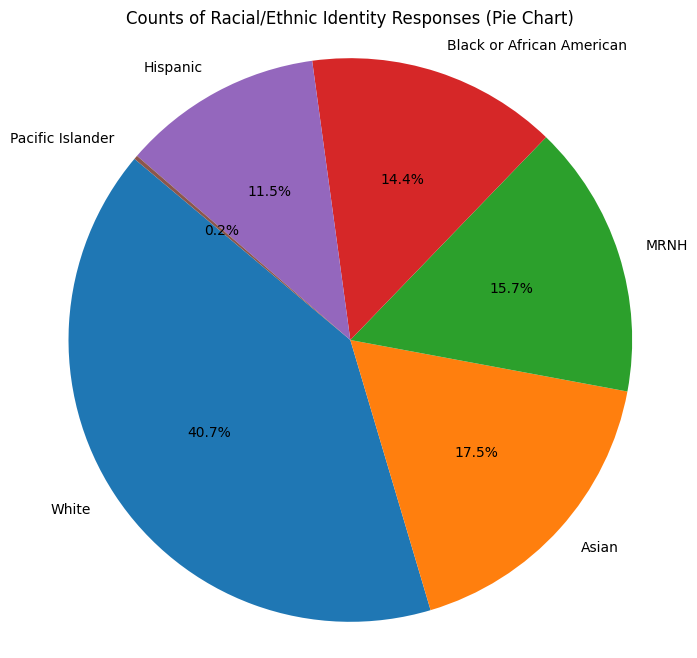

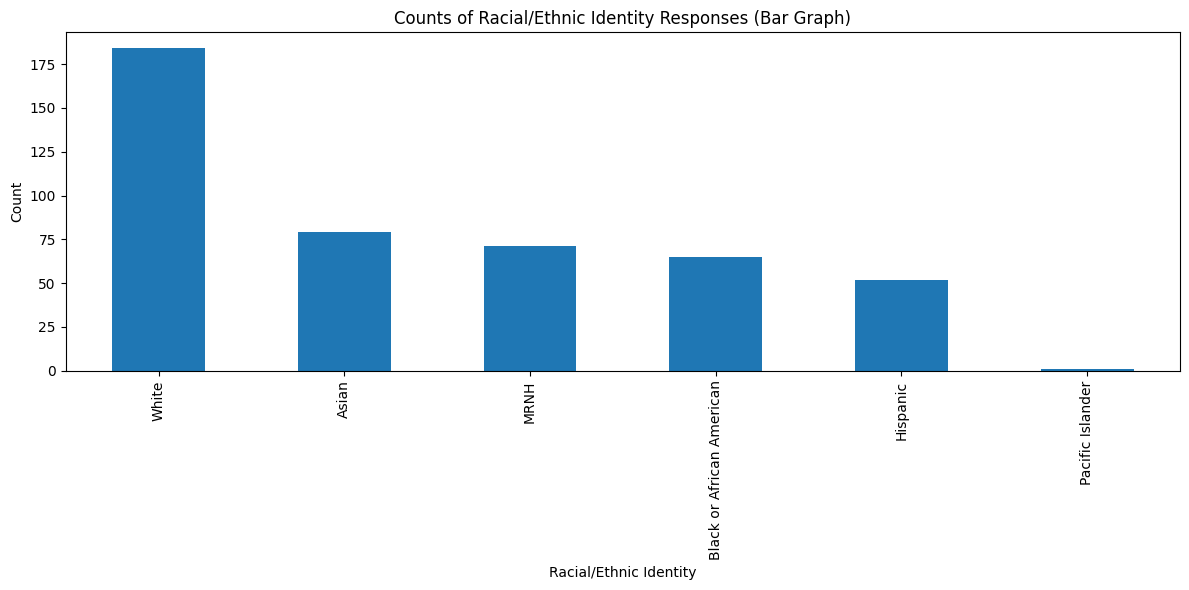

In [27]:
counts = Respondants[race].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Counts of Racial/Ethnic Identity Responses (Pie Chart)')
plt.axis('equal')
#plt.savefig("Race_pie_chart.png", bbox_inches='tight')  # Save as PNG
plt.show()

# Bar graph
plt.figure(figsize=(12, 6))
counts.plot(kind='bar')
plt.title('Counts of Racial/Ethnic Identity Responses (Bar Graph)')
plt.xlabel('Racial/Ethnic Identity')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("Race_bar_graph.png", bbox_inches='tight')  # Save as PNG
plt.show()

## Races of respondents who think there are inequities vs who disagree
This cell creates two pie charts: one showing the racial breakdown of respondents who AGREE that there are inequities at CRLS, and one for respondents who DISAGREE. Neutral/Neither responses are ignored.

In [ ]:
# Locate the inequities question column robustly (partial match)
q_candidates = [c for c in Respondants.columns if 'inequit' in c.lower() or 'there are inequities' in c.lower() or ('respond with your opinion' in c.lower() and 'inequit' in c.lower())]
if len(q_candidates) == 0:
    # Fallback: print columns to help debugging
    raise ValueError('Could not find the inequities question column. Try searching Respondants.columns for the question text.')
q = q_candidates[0]
print('Using question column:', q)

# Prepare a small dataframe with race and the response
df_q = Respondants[[race, q]].copy()
# Normalize text for reliable matching
df_q[q] = df_q[q].astype(str).str.strip().str.lower()

# Define masks for Agree vs Disagree; neutral/other ignored
agree_mask = df_q[q].str.contains('agree', na=False) | df_q[q].str.match(r'^(yes|y)\b', na=False)
disagree_mask = df_q[q].str.contains('disagree', na=False) | df_q[q].str.match(r'^(no|n)\b', na=False)

# Count races for each group; drop missing or empty race values
agree_counts = df_q.loc[agree_mask, race].dropna().replace('', np.nan).dropna().value_counts()
disagree_counts = df_q.loc[disagree_mask, race].dropna().replace('', np.nan).dropna().value_counts()

# Plot side-by-side pie charts
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

if agree_counts.sum() == 0:
    axs[0].text(0.5, 0.5, 'No Agree responses found', ha='center', va='center')
    axs[0].set_title('Agree - no data')
else:
    axs[0].pie(agree_counts, labels=agree_counts.index, autopct='%1.1f%%', startangle=140)
    axs[0].set_title('Races of respondents who AGREE there are inequities')

if disagree_counts.sum() == 0:
    axs[1].text(0.5, 0.5, 'No Disagree responses found', ha='center', va='center')
    axs[1].set_title('Disagree - no data')
else:
    axs[1].pie(disagree_counts, labels=disagree_counts.index, autopct='%1.1f%%', startangle=140)
    axs[1].set_title('Races of respondents who DISAGREE there are inequities')

for ax in axs:
    ax.axis('equal')

plt.tight_layout()
# Save a PNG next to the notebook for quick reference
plt.savefig('/Users/calder/Documents/Statistics Project/StatisticalAnalysis/Jupyter_notebooks/inequities_race_pies.png', bbox_inches='tight')
plt.show()

# Print raw counts for debugging/inspection
print('
Agree counts:
', agree_counts)
print('
Disagree counts:
', disagree_counts)